In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import glob
#47都道府県分csvファイルがあるので、全て結合して１つのファイルとする
# csv_files = glob.glob('train/*.csv')

In [3]:
# #csvファイルの中身を追加していくリストを用意
# data_list = []

# #読み込むファイルのリストを走査
# for file in csv_files:
#     data_list.append(pd.read_csv(file))

# #リストを全て行方向に結合
# #axis=1:行方向に結合, sort
# df = pd.concat(data_list, axis=0, sort=True)

# df.to_csv("train/train_all_pre.csv",index=False)

In [385]:
train = pd.read_csv('train/train_all_pre.csv')
test = pd.read_csv('test.csv')

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [386]:
#結合→分割時の目印にする
train['Train_flg'] = True
test['Train_flg'] = False

In [387]:
#trainとtestを合わせる
data = pd.concat([train, test])
data = data.reset_index() 

In [8]:
train.shape

(3313995, 29)

In [9]:
test.shape

(23204, 28)

In [10]:
data.shape

(3337199, 30)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337199 entries, 0 to 3337198
Data columns (total 30 columns):
 #   Column        Dtype  
---  ------        -----  
 0   index         int64  
 1   ID            int64  
 2   今後の利用目的       object 
 3   前面道路：幅員（ｍ）    float64
 4   前面道路：方位       float64
 5   前面道路：種類       float64
 6   取引の事情等        object 
 7   取引価格（総額）_log  float64
 8   取引時点          object 
 9   土地の形状         float64
 10  地区名           object 
 11  地域            float64
 12  容積率（％）        float64
 13  市区町村コード       int64  
 14  市区町村名         object 
 15  延床面積（㎡）       float64
 16  建ぺい率（％）       float64
 17  建物の構造         object 
 18  建築年           object 
 19  改装            object 
 20  最寄駅：名称        object 
 21  最寄駅：距離（分）     object 
 22  用途            object 
 23  種類            object 
 24  都市計画          object 
 25  都道府県名         object 
 26  間取り           object 
 27  間口            float64
 28  面積（㎡）         object 
 29  Train_flg     bool   
dtypes: bool(1), float6

In [146]:
data.describe()

,index,ID,前面道路：幅員（ｍ）,前面道路：方位,前面道路：種類,取引価格（総額）_log,土地の形状,地域,容積率（％）,市区町村コード,延床面積（㎡）,建ぺい率（％）,間口
count,3.337199e+06,3.337199e+06,0.0,0.0,0.0,3.313995e+06,0.0,0.0,3.221513e+06,3.337199e+06,0.0,3.221513e+06,0.0
mean,1.645556e+06,1.847997e+07,NaN,NaN,NaN,7.220486e+00,NaN,NaN,3.020027e+02,1.851663e+04,NaN,6.763176e+01,NaN
std,9.630909e+05,9.568748e+06,NaN,NaN,NaN,3.543172e-01,NaN,NaN,1.482110e+02,9.597565e+03,NaN,1.040626e+01,NaN
min,0.000000e+00,1.000001e+06,NaN,NaN,NaN,2.653213e+00,NaN,NaN,5.000000e+01,1.101000e+03,NaN,3.000000e+01,NaN
25%,8.110955e+05,1.306405e+07,NaN,NaN,NaN,7.041393e+00,NaN,NaN,2.000000e+02,1.310700e+04,NaN,6.000000e+01,NaN
50%,1.645395e+06,1.402824e+07,NaN,NaN,NaN,7.278754e+00,NaN,NaN,2.000000e+02,1.410400e+04,NaN,6.000000e+01,NaN
75%,2.479694e+06,2.703384e+07,NaN,NaN,NaN,7.462398e+00,NaN,NaN,4.000000e+02,2.711400e+04,NaN,8.000000e+01,NaN
max,3.313994e+06,4.703281e+07,NaN,NaN,NaN,9.934498e+00,NaN,NaN,1.300000e+03,4.721300e+04,NaN,8.000000e+01,NaN


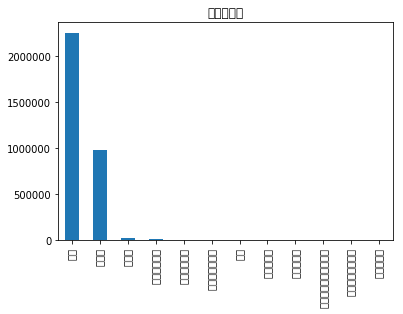

In [261]:
counts = data['建物の構造'].value_counts()
counts
counts.plot.bar(title='建物の構造')

## 改装済かどうか

In [93]:
data['改装'].value_counts()

未改装    2187377
改装済     846322
Name: 改装, dtype: int64

In [388]:
data['改装'][(data['改装'] == '未改装') | (data['改装'].isnull() == True)] = 0
data['改装'][data['改装'] == '改装済'] = 1

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [389]:
data['改装'] = data['改装'].astype(int)

In [95]:
data['改装'].value_counts()

0    2490877
1     846322
Name: 改装, dtype: int64

## 取引時点を加工

In [390]:
data['取引時点_年'] = data['取引時点'].str[:4]
data['取引時点_四半期'] = data['取引時点'].str[5:]

def change_date(取引時点_四半期):
    if 取引時点_四半期 == '第１四半期':
        return '0331'
    elif 取引時点_四半期 == '第２四半期':
        return '0630'
    elif 取引時点_四半期 == '第３四半期':                          
        return '0930'
    elif 取引時点_四半期 == '第４四半期':
        return '1231'
    else:
        return ''

In [391]:
data['取引時点_2'] = data['取引時点_四半期'].apply(change_date)

In [392]:
data['取引年月'] = data['取引時点_年'] + data['取引時点_2']

In [331]:
data['取引年月'].head()

0    20060930
1    20190331
2    20121231
3    20110630
4    20100930
Name: 取引年月, dtype: object

## 建築年を加工

In [393]:
data['和暦開始'] = data['建築年'].str[:2]

In [161]:
data['和暦開始'].unique()

array(['平成', '昭和', nan, '戦前', '令和'], dtype=object)

In [394]:
#戦前、nanは1930とする
def era_convert(和暦開始):
    if 和暦開始 == '昭和':
        return 1925
    elif 和暦開始 == '平成':
        return 1988
    elif 和暦開始 == '令和':
        return 2018
    else:
        return 1930

In [395]:
data['和暦開始年'] = data['和暦開始'].apply(era_convert)

In [396]:
data['和暦_年'] = data['建築年'].str[2:4]

In [397]:
data['和暦_年'] = data['和暦_年'].str.replace('年', '')

In [166]:
data['和暦_年'].unique()

array(['3', '58', '13', '64', '12', '62', '8', '27', '20', '59', '63',
       nan, '10', '60', '50', '2', '11', '54', '16', '49', '61', '6', '7',
       '18', '17', '9', '22', '5', '24', '25', '15', '21', '30', '4',
       '14', '26', '19', '29', '31', '55', '46', '57', '56', '23', '51',
       '47', '48', '52', '53', '43', '40', '28', '44', '', '36', '45',
       '41', '42', '39', '37', '32', '33', '38', '34', '35'], dtype=object)

In [398]:
#nanは0とする
data['和暦_年'][(data['和暦_年'] == '') | (data['和暦_年'].isnull())] = '0'

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
data['和暦開始年'].unique()

array([1988, 1925, 1930, 2018])

In [168]:
data['和暦開始年'].value_counts()

1988    2248653
1925     987808
1930      99187
2018       1551
Name: 和暦開始年, dtype: int64

In [399]:
data['和暦開始年'] = data['和暦開始年'].astype(int)
data['和暦_年'] = data['和暦_年'].astype(int)

In [400]:
data['西暦'] = data['和暦開始年'] + data['和暦_年']

In [33]:
data['西暦'].head()

0    1991
1    1983
2    2001
3    1989
4    2000
Name: 西暦, dtype: int64

## 特徴量として東京23区を追加

In [401]:
data['東京23区'] = data['市区町村名'][(data['都道府県名'] == '東京都') & (data['市区町村名'].str.contains('区'))]

In [402]:
data['東京23区'] = data['東京23区'].fillna('')

In [403]:
def tokyo_city(x):
    if x != '':
        return 1
    else:
        return 0

In [404]:
data['東京23区'] = data['東京23区'].apply(tokyo_city)

In [405]:
#確認
data[['都道府県名', '市区町村名', '東京23区']][(data['都道府県名'] == '東京都') & (data['東京23区'] == 1)].head()

,都道府県名,市区町村名,東京23区
1238600,東京都,豊島区,1
1238601,東京都,江戸川区,1
1238602,東京都,品川区,1
1238603,東京都,大田区,1
1238604,東京都,渋谷区,1


In [46]:
#確認
data[['都道府県名', '市区町村名', '東京23区']][(data['都道府県名'] == '東京都') & (data['東京23区'] == 0)].head()

,都道府県名,市区町村名,東京23区
1238608,東京都,清瀬市,0
1238619,東京都,清瀬市,0
1238622,東京都,日野市,0
1238623,東京都,福生市,0
1238637,東京都,八王子市,0


## 最寄駅：距離（分）を加工

In [344]:
data['最寄駅：距離（分）'].unique()

array([nan, '25', '30分?60分', '21', '13', '5', '2', '11', '7', '10', '6',
       '14', '3', '8', '15', '4', '9', '16', '18', '1H?1H30', '23', '1',
       '20', '19', '26', '12', '28', '24', '29', '0', '27', '17',
       '1H30?2H', '22', '2H?'], dtype=object)

In [406]:
#文言から推察
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '30分?60分')] = '30'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '1H?1H30')] = '60'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '1H30?2H')] = '90'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '2H?')] = '120'

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [407]:
data['最寄駅：距離（分）'][data['最寄駅：距離（分）'].isnull() == True] = '0'

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
data['最寄駅：距離（分）'].value_counts()

6      267079
4      257406
5      238878
8      232628
3      225912
9      201459
7      170023
30     166569
10     165876
11     160562
2      142633
0      134809
13     119520
1      103507
14      98201
15      97069
12      79310
16      74980
18      60995
19      54978
20      46525
21      37337
23      34745
25      32219
24      25645
28      21456
26      20824
60      18851
29      18702
17      12939
22       5540
120      4348
90       3571
27       2103
Name: 最寄駅：距離（分）, dtype: int64

In [347]:
data['最寄駅：距離（分）'] = data['最寄駅：距離（分）'].astype(int)

## 立地

In [318]:
#東京23区かつ徒歩15分以内
rich = data[(data['東京23区'] == 1) & (data['最寄駅：距離（分）'] <= 15)]
(rich['ID'].count() / data['ID'].count()) * 100   #全体に占める割合

24.550318995061428

In [383]:
rich.describe()

,index,ID,前面道路：幅員（ｍ）,前面道路：方位,前面道路：種類,取引価格（総額）_log,土地の形状,地域,容積率（％）,市区町村コード,延床面積（㎡）,建ぺい率（％）,改装,最寄駅：距離（分）,間口,和暦開始年,和暦_年,西暦,東京23区,好立地
count,8.192930e+05,8.192930e+05,0.0,0.0,0.0,813045.000000,0.0,0.0,805996.000000,819293.000000,0.0,805996.000000,819293.000000,819293.000000,0.0,819293.000000,819293.000000,819293.000000,819293.0,819293.0
mean,2.240721e+06,1.313965e+07,NaN,NaN,NaN,7.414439,NaN,NaN,376.049583,13111.072946,NaN,70.012767,0.224309,6.109446,NaN,1970.530821,25.567685,1996.098506,1.0,0.0
std,6.793541e+05,9.687783e+04,NaN,NaN,NaN,0.298538,NaN,NaN,152.575860,6.248081,NaN,10.277689,0.417127,3.682267,NaN,28.130677,18.921574,15.253910,0.0,0.0
min,3.944000e+03,1.300000e+07,NaN,NaN,NaN,3.079181,NaN,NaN,60.000000,13101.000000,NaN,30.000000,0.000000,0.000000,NaN,1925.000000,0.000000,1930.000000,1.0,0.0
25%,1.742581e+06,1.305674e+07,NaN,NaN,NaN,7.255273,NaN,NaN,300.000000,13106.000000,NaN,60.000000,0.000000,3.000000,NaN,1925.000000,12.000000,1988.000000,1.0,0.0
50%,2.253966e+06,1.312425e+07,NaN,NaN,NaN,7.414973,NaN,NaN,300.000000,13111.000000,NaN,80.000000,0.000000,6.000000,NaN,1988.000000,18.000000,2000.000000,1.0,0.0
75%,2.765649e+06,1.321472e+07,NaN,NaN,NaN,7.602060,NaN,NaN,500.000000,13116.000000,NaN,80.000000,0.000000,9.000000,NaN,1988.000000,44.000000,2006.000000,1.0,0.0
max,3.277088e+06,1.342107e+07,NaN,NaN,NaN,9.934498,NaN,NaN,1300.000000,13123.000000,NaN,80.000000,1.000000,15.000000,NaN,2018.000000,64.000000,2020.000000,1.0,0.0


In [311]:
#都市部
city = data[(data['都道府県名'] == '東京都') | (data['都道府県名'] == '大阪府')]
around = data[(data['都道府県名'] != '東京都') | (data['都道府県名'] != '大阪府')]

In [381]:
city.describe()

,index,ID,前面道路：幅員（ｍ）,前面道路：方位,前面道路：種類,取引価格（総額）_log,土地の形状,地域,容積率（％）,市区町村コード,延床面積（㎡）,建ぺい率（％）,改装,最寄駅：距離（分）,間口,和暦開始年,和暦_年,西暦,東京23区,好立地
count,1.377588e+06,1.377588e+06,0.0,0.0,0.0,1.367360e+06,0.0,0.0,1.352482e+06,1.377588e+06,0.0,1.352482e+06,1.377588e+06,1.377588e+06,0.0,1.377588e+06,1.377588e+06,1.377588e+06,1.377588e+06,1377588.0
mean,1.781662e+06,1.699159e+07,NaN,NaN,NaN,7.335088e+00,NaN,NaN,3.477804e+02,1.696778e+04,NaN,6.926920e+01,2.370665e-01,7.676379e+00,NaN,1.968039e+03,2.675969e+01,1.994798e+03,6.182204e-01,0.0
std,9.579371e+05,6.212670e+06,NaN,NaN,NaN,3.197471e-01,NaN,NaN,1.617084e+02,6.256951e+03,NaN,1.046301e+01,4.252836e-01,6.091330e+00,NaN,2.923577e+01,1.981629e+01,1.535181e+01,4.858231e-01,0.0
min,3.944000e+03,1.300000e+07,NaN,NaN,NaN,2.653213e+00,NaN,NaN,5.000000e+01,1.310100e+04,NaN,3.000000e+01,0.000000e+00,0.000000e+00,NaN,1.925000e+03,0.000000e+00,1.930000e+03,0.000000e+00,0.0
25%,9.697558e+05,1.309826e+07,NaN,NaN,NaN,7.146128e+00,NaN,NaN,2.000000e+02,1.310900e+04,NaN,6.000000e+01,0.000000e+00,4.000000e+00,NaN,1.925000e+03,1.200000e+01,1.986000e+03,0.000000e+00,0.0
50%,1.804200e+06,1.324006e+07,NaN,NaN,NaN,7.361728e+00,NaN,NaN,3.000000e+02,1.311900e+04,NaN,6.000000e+01,0.000000e+00,6.000000e+00,NaN,1.988000e+03,1.900000e+01,1.999000e+03,1.000000e+00,0.0
75%,2.671327e+06,2.701244e+07,NaN,NaN,NaN,7.544068e+00,NaN,NaN,4.000000e+02,2.710600e+04,NaN,8.000000e+01,0.000000e+00,1.000000e+01,NaN,1.988000e+03,4.800000e+01,2.006000e+03,1.000000e+00,0.0
max,3.277089e+06,2.725973e+07,NaN,NaN,NaN,9.934498e+00,NaN,NaN,1.300000e+03,2.736600e+04,NaN,8.000000e+01,1.000000e+00,1.200000e+02,NaN,2.018000e+03,6.400000e+01,2.020000e+03,1.000000e+00,0.0


In [382]:
around.describe()

,index,ID,前面道路：幅員（ｍ）,前面道路：方位,前面道路：種類,取引価格（総額）_log,土地の形状,地域,容積率（％）,市区町村コード,延床面積（㎡）,建ぺい率（％）,改装,最寄駅：距離（分）,間口,和暦開始年,和暦_年,西暦,東京23区,好立地
count,3.337199e+06,3.337199e+06,0.0,0.0,0.0,3.313995e+06,0.0,0.0,3.221513e+06,3.337199e+06,0.0,3.221513e+06,3.337199e+06,3.337199e+06,0.0,3.337199e+06,3.337199e+06,3.337199e+06,3.337199e+06,3337199.0
mean,1.645556e+06,1.847997e+07,NaN,NaN,NaN,7.220486e+00,NaN,NaN,3.020027e+02,1.851663e+04,NaN,6.763176e+01,2.536025e-01,1.044285e+01,NaN,1.967642e+03,2.560669e+01,1.993249e+03,2.551999e-01,0.0
std,9.630909e+05,9.568748e+06,NaN,NaN,NaN,3.543172e-01,NaN,NaN,1.482110e+02,9.597565e+03,NaN,1.040626e+01,4.350728e-01,9.758597e+00,NaN,2.933906e+01,2.097689e+01,1.582339e+01,4.359736e-01,0.0
min,0.000000e+00,1.000001e+06,NaN,NaN,NaN,2.653213e+00,NaN,NaN,5.000000e+01,1.101000e+03,NaN,3.000000e+01,0.000000e+00,0.000000e+00,NaN,1.925000e+03,0.000000e+00,1.930000e+03,0.000000e+00,0.0
25%,8.110955e+05,1.306405e+07,NaN,NaN,NaN,7.041393e+00,NaN,NaN,2.000000e+02,1.310700e+04,NaN,6.000000e+01,0.000000e+00,4.000000e+00,NaN,1.925000e+03,9.000000e+00,1.986000e+03,0.000000e+00,0.0
50%,1.645395e+06,1.402824e+07,NaN,NaN,NaN,7.278754e+00,NaN,NaN,2.000000e+02,1.410400e+04,NaN,6.000000e+01,0.000000e+00,8.000000e+00,NaN,1.988000e+03,1.800000e+01,1.996000e+03,0.000000e+00,0.0
75%,2.479694e+06,2.703384e+07,NaN,NaN,NaN,7.462398e+00,NaN,NaN,4.000000e+02,2.711400e+04,NaN,8.000000e+01,1.000000e+00,1.400000e+01,NaN,1.988000e+03,4.900000e+01,2.004000e+03,1.000000e+00,0.0
max,3.313994e+06,4.703281e+07,NaN,NaN,NaN,9.934498e+00,NaN,NaN,1.300000e+03,4.721300e+04,NaN,8.000000e+01,1.000000e+00,1.200000e+02,NaN,2.018000e+03,6.400000e+01,2.021000e+03,1.000000e+00,0.0


In [314]:
city['都道府県名'].value_counts().sum()

1377588

In [315]:
around['都道府県名'].value_counts().sum()

3337199

In [317]:
(city['都道府県名'].value_counts().sum() / around['都道府県名'].value_counts().sum()) * 100

41.27976785322062

In [408]:
data['都市部'] = 0
data['都市部'][(data['都道府県名'] == '東京都') | (data['都道府県名'] == '大阪府')] = 1

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [351]:
data['都市部'][(data['都道府県名'] == '東京都') | (data['都道府県名'] == '大阪府')] 

123739     1
123740     1
123741     1
123742     1
123743     1
          ..
3333532    1
3333533    1
3333534    1
3333535    1
3333536    1
Name: 都市部, Length: 1377588, dtype: int64

In [352]:
data['都市部'][data['都道府県名'] == '山梨県']

104100     0
104101     0
104102     0
104103     0
104104     0
          ..
3328658    0
3328659    0
3328660    0
3328661    0
3328662    0
Name: 都市部, Length: 2783, dtype: int64

In [322]:
data['都道府県名'][data['都道府県名'] == '東京都']

Series([], Name: 都道府県名, dtype: object)

## 面積を確認・置換

In [52]:
data['面積（㎡）'].unique()

array(['50', '70', '65', '20', '80', '30', '15', '60', '75', '90', '95',
       '85', '55', '100', '25', '35', '45', '110', '40', '155', '115',
       '10', '145', '105', '140', '400', '125', '120', '130', '135',
       '220', '170', '210', '160', '150', '175', '180', '190', '165',
       '440', '740', '330', '230', '320', '290', '2000㎡以上', '480', '360',
       '630', '195', '500', '260', '280', '350', '370', '830', '300',
       '710', '820', '980', '270', '470', '520', '460', '185', '570',
       '310', '790', '250', '600', '200', '240', '730', 70, 85, 50, 65,
       45, 60, 75, 80, 30, 20, 90, 130, 55, 120, 95, 15, 25, 100, 150,
       125, 40, 110, 35, 115, 140, 10, 105, 270, 155, 175, 135, 165, 145,
       160, 180, 185, 200, 680, 390, 410, 170, 670, 760, 690, 340, 650,
       310, 290, 970, 600, 440, 230, 370, 195, 190, 350, '610', '620',
       '590', '410', '650', '660', '780', 250, 260, 210, 1000, 330, 730,
       300, 1100, 430, 220, 510, 320, 500, 460, 450, 240, 800, 700, 83

In [353]:
data['面積（㎡）'][data['面積（㎡）'] == '2000㎡以上'] = 2000
data['面積（㎡）'] = data['面積（㎡）'].astype(int)

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [355]:
#特徴量を選択
data = data[['ID','市区町村コード', '最寄駅：距離（分）', '面積（㎡）', '取引年月', '西暦', '東京23区', '改装', '都市計画', '都市部',\
             '間取り','Train_flg','取引価格（総額）_log']] 

In [356]:
data.head()

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,取引年月,西暦,東京23区,改装,都市計画,都市部,間取り,Train_flg,取引価格（総額）_log
0,40133875,40131,0,50,20060930,1991,0,0,NaN,0,２ＬＤＫ,True,6.740363
1,40054793,40135,25,50,20190331,1983,0,1,準住居地域,0,３ＤＫ,True,6.977724
2,40058576,40134,30,70,20121231,2001,0,1,第２種住居地域,0,３ＬＤＫ,True,7.255273
3,40014894,40131,21,70,20110630,1989,0,0,工業地域,0,２ＬＤＫ,True,6.740363
4,40012487,40133,13,65,20100930,2000,0,0,第１種住居地域,0,３ＬＤＫ,True,7.431364


## 間取りをエンコーディング

In [357]:
data_dummies = data[['間取り']]
data_dummies = pd.get_dummies(data_dummies)

In [358]:
data = pd.concat([data, data_dummies], axis=1)
data = data.drop(['間取り'], axis=1)

In [62]:
train['間取り'].value_counts().head(20)

３ＬＤＫ       1413115
１Ｋ          482525
２ＬＤＫ        477140
４ＬＤＫ        302940
１ＬＤＫ        140300
２ＤＫ         105435
１ＤＫ          96335
３ＤＫ          60845
１Ｒ           34955
オープンフロア      26545
２ＬＤＫ＋Ｓ       19435
４ＤＫ           8640
２Ｋ            6525
１ＬＤＫ＋Ｓ        5635
３ＬＤＫ＋Ｓ        4615
５ＬＤＫ          4265
３Ｋ            2420
２ＤＫ＋Ｓ         2245
４ＬＤＫ＋Ｓ         830
４Ｋ             795
Name: 間取り, dtype: int64

In [60]:
test['間取り'].value_counts()

３ＬＤＫ       9083
１Ｋ         4106
２ＬＤＫ       3617
４ＬＤＫ       1760
１ＬＤＫ       1228
２ＤＫ         691
１ＤＫ         634
３ＤＫ         281
１Ｒ          188
オープンフロア     127
２ＬＤＫ＋Ｓ      123
４ＤＫ          39
１ＬＤＫ＋Ｓ       37
３ＬＤＫ＋Ｓ       29
２Ｋ           29
５ＬＤＫ         22
３Ｋ           12
２ＤＫ＋Ｓ        10
５ＬＤＫ＋Ｓ        5
３ＤＫ＋Ｓ         2
メゾネット         2
３ＬＫ           2
５ＤＫ           2
４Ｋ            1
１ＤＫ＋Ｓ         1
１Ｌ            1
１Ｋ＋Ｓ          1
スタジオ          1
６ＬＤＫ          1
Name: 間取り, dtype: int64

In [64]:
train['間取り'].nunique()

63

In [63]:
test['間取り'].nunique()

29

In [359]:
#間取りはtrainとtestに共通しているものを抜粋。数が少ないもの（２桁）は除外
data = data[['ID','市区町村コード', '最寄駅：距離（分）', '面積（㎡）', '取引年月', '西暦', '東京23区', '改装', '都市計画', '都市部',\
             '間取り_３ＬＤＫ', '間取り_１Ｋ', '間取り_２ＬＤＫ', '間取り_４ＬＤＫ', '間取り_１ＬＤＫ', '間取り_２ＤＫ', '間取り_１ＤＫ', '間取り_３ＤＫ',\
             '間取り_１Ｒ', '間取り_オープンフロア', '間取り_２ＬＤＫ＋Ｓ', 'Train_flg','取引価格（総額）_log']] 

## 都市計画をエンコーディング

In [39]:
test['都市計画'].value_counts()

商業地域                      6857
第１種住居地域                   3489
第１種中高層住居専用地域              3428
準工業地域                     2778
近隣商業地域                    2460
第２種住居地域                   1073
第２種中高層住居専用地域               954
第１種低層住居専用地域                661
工業地域                       582
準住居地域                      419
市街化調整区域                    134
第２種低層住居専用地域                 31
都市計画区域外                     10
工業専用地域                       7
市街化区域及び市街化調整区域外の都市計画区域       5
Name: 都市計画, dtype: int64

In [360]:
data_dummies = data[['都市計画']]
data_dummies = pd.get_dummies(data_dummies)

In [361]:
data = pd.concat([data, data_dummies], axis=1)
data = data.drop(['都市計画'], axis=1)

In [362]:
data.head()

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,取引年月,西暦,東京23区,改装,都市部,間取り_３ＬＤＫ,...,都市計画_準工業地域,都市計画_準都市計画区域,都市計画_第１種中高層住居専用地域,都市計画_第１種低層住居専用地域,都市計画_第１種住居地域,都市計画_第２種中高層住居専用地域,都市計画_第２種低層住居専用地域,都市計画_第２種住居地域,都市計画_近隣商業地域,都市計画_都市計画区域外
0,40133875,40131,0,50,20060930,1991,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40054793,40135,25,50,20190331,1983,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40058576,40134,30,70,20121231,2001,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,40014894,40131,21,70,20110630,1989,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40012487,40133,13,65,20100930,2000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337199 entries, 0 to 3337198
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ID                           int64  
 1   市区町村コード                      int64  
 2   最寄駅：距離（分）                    int64  
 3   面積（㎡）                        int64  
 4   取引年月                         object 
 5   西暦                           int64  
 6   東京23区                        int64  
 7   改装                           int64  
 8   間取り_３ＬＤＫ                     uint8  
 9   間取り_１Ｋ                       uint8  
 10  間取り_２ＬＤＫ                     uint8  
 11  間取り_４ＬＤＫ                     uint8  
 12  間取り_１ＬＤＫ                     uint8  
 13  間取り_２ＤＫ                      uint8  
 14  間取り_１ＤＫ                      uint8  
 15  間取り_３ＤＫ                      uint8  
 16  間取り_１Ｒ                       uint8  
 17  間取り_オープンフロア                  uint8  
 18  間取り_２ＬＤＫ＋Ｓ                   uint8  
 19  

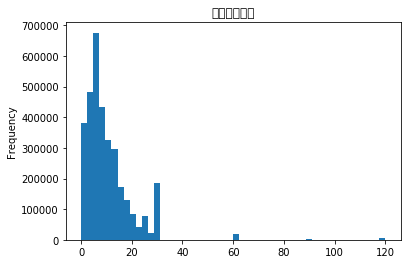

In [194]:
y = data['最寄駅：距離（分）']
y.plot.hist(title='駅からの距離', bins=50)
plt.show()

## モデリングの為にデータを分割

In [363]:
train = data[data['Train_flg'] == True]
test= data[data['Train_flg'] == False]

In [364]:
#IDは提出時に使うので変数に入れておく
test_id = test[['ID']]

In [365]:
test = test.drop(['ID'], axis=1)
train = train.drop(['ID'], axis=1)

In [366]:
## 目的変数の列を除外
test = test.drop('取引価格（総額）_log', axis=1)

In [367]:
y = train['取引価格（総額）_log']

In [368]:
train = train.drop('取引価格（総額）_log', axis=1)

In [369]:
X_train, y_train = train, y
X_test = test

In [370]:
#クロスバリデーション
#ランダムフォレスト

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=4, shuffle=True, random_state=71)

tr_idx, va_idx = list(kf.split(X_train))[0]

tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

rf = RandomForestRegressor(max_depth=5, random_state=42)

rf.fit(tr_x, tr_y)

va_pred = rf.predict(va_x)
score = mean_absolute_error(va_y, va_pred)

y_pred = rf.predict(X_test)

In [371]:
print(va_pred)

[6.96705213 7.04931664 7.00342109 ... 7.42183963 6.86573931 7.30497322]


In [372]:
print(score)

0.15745712523068853


In [373]:
print(y_pred)

[6.86912135 6.86912135 7.00342109 ... 6.86912135 7.04334016 7.53364176]


In [374]:
y_pred_sub = y_pred
test_id_sub = test_id

In [375]:
y_pred_sub = pd.DataFrame({
        "取引価格（総額）_log": y_pred_sub
    })

In [376]:
test_id_sub = test_id_sub.reset_index(drop=True)

In [377]:
test_id_sub['取引価格（総額）_log'] = y_pred_sub['取引価格（総額）_log']

In [378]:
test_id_sub.to_csv("submission_3.csv", index = False)

In [379]:
submission_3 = pd.read_csv('submission_3.csv')
submission_3

,ID,取引価格（総額）_log
0,1000114,6.869121
1,1000116,6.869121
2,1000117,7.003421
3,1000118,7.304973
4,1000119,6.468594
...,...,...
23199,47012519,7.421840
23200,47014760,7.056817
23201,47014956,6.869121
23202,47015505,7.043340


In [380]:
submission_3.isnull().any()

ID              False
取引価格（総額）_log    False
dtype: bool